In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import RGBNirBioCountryDataModule

In [3]:
dm = RGBNirBioCountryDataModule()
dm.setup()

train: 1587395
val: 40080
test: 36421


In [4]:
batch = next(iter(dm.train_dataloader(batch_size=25)))

In [5]:
batch['rgb'].shape, batch['rgb'].dtype, batch['rgb'].max(), batch['rgb'].min()

(torch.Size([25, 256, 256, 3]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8))

In [6]:
batch['nir'].shape, batch['nir'].dtype, batch['nir'].max(), batch['nir'].min()

(torch.Size([25, 256, 256]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8))

In [7]:
batch['bio'].shape, batch['bio'].dtype, batch['bio'].max(), batch['bio'].min()

(torch.Size([25, 27]), torch.float32, tensor(4.0879), tensor(-3.6918))

In [8]:
batch['country'].shape, batch['country'].dtype, batch['country'].max(), batch['country'].min()

(torch.Size([25]), torch.int64, tensor(1), tensor(0))

In [9]:
batch['label'].shape, batch['label'].dtype

(torch.Size([25]), torch.int64)

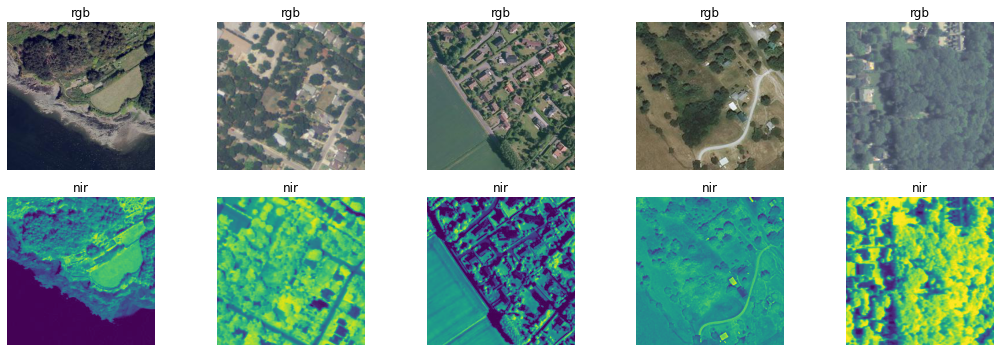

In [10]:
import matplotlib.pyplot as plt

# plot images in a 2x5 grid
fig = plt.figure(figsize=(15,5))
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    ax.imshow(batch['rgb'][i])
    ax.set_title('rgb')
    ax.axis('off')
    ax = plt.subplot(2, 5, i+1+5)
    ax.set_title('nir')
    ax.imshow(batch['nir'][i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [11]:
from src import RGBNirBioCountryModule

hparams = {
    'backbone': 'resnet18',
    'pretrained': True,
    'num_bio': 28,
    'bio_layers': [100],
    'bio_dropout': 0.,
    'optimzier': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}

module = RGBNirBioCountryModule(hparams)
outputs = module(batch)
outputs.shape

torch.Size([25, 17037])

In [12]:
import pytorch_lightning as pl

hparams = {
    'datamodule': {
        'batch_size': 32,
        'num_workers': 0,
        'pin_memory': False
    },
    'backbone': 'resnet18',
    'pretrained': True,
    'num_bio': 28,
    'bio_layers': [100],
    'bio_dropout': 0.,
    'optimizer': 'Adam',
    'optimizer_params': {
        'lr': 1e-3
    }
}


dm = RGBNirBioCountryDataModule(**hparams['datamodule'])
module = RGBNirBioCountryModule(hparams)

trainer = pl.Trainer(
    gpus=[1],
    max_epochs=10,
    enable_checkpointing=False,
    logger=None,
    overfit_batches=1
)

trainer.fit(module, dm)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


train: 1587395
val: 40080
test: 36421



  | Name       | Type       | Params
------------------------------------------
0 | model      | ResNet     | 11.2 M
1 | bio_mlp    | Sequential | 2.9 K 
2 | classifier | Linear     | 10.4 M
------------------------------------------
21.6 M    Trainable params
0         Non-trainable params
21.6 M    Total params
86.505    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/juan/miniconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:473: UserWarning: You requested to overfit but enabled val/test dataloader shuffling. We are turning it off for you.
  rank_zero_warn(
/home/juan/miniconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/juan/miniconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:638: UserWarning: You requested to overfit but enabled training dataloader shuffling. We are turning off the training dataloader shuffling for you.
  rank_zero_warn(
/home/juan/miniconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_data

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]